In [1]:
import tensorflow as tf
import numpy as np
import os
import cv2

2023-10-30 11:34:55.203103: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-30 11:34:55.411745: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 11:34:55.411810: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 11:34:55.412797: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 11:34:55.505496: I tensorflow/core/platform/cpu_feature_g

In [2]:
tf.config.list_physical_devices('GPU')

2023-10-30 11:35:00.134266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 11:35:00.151917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 11:35:00.152090: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
IMG_WIDTH = 384
IMG_HEIGHT = 384
IMG_CHANNELS = 3

## Dowloading the dataset from ROBOFLOW

In [4]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="4c6NVylOsFaXDSrcKDsZ")
# project = rf.workspace("uni-phtjr").project("floor-segmentation-huuot")
# dataset = project.version(1).download("png-mask-semantic")


# # Also you should move the classes file from each folder to one folder before

In [5]:
# dataset.location

In [6]:
TRAIN_PATH = '/home/luishuingo/semantics_segmentation/Floor-Segmentation-1/train/'
TEST_PATH = '/home/luishuingo/semantics_segmentation/Floor-Segmentation-1/test/'
VALID_PATH = '/home/luishuingo/semantics_segmentation/Floor-Segmentation-1/valid/'

X_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(os.listdir(TRAIN_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing training images and masks')

for n, id_ in enumerate(os.listdir(TRAIN_PATH)):
    
    # Load and resize the training image
    img = cv2.imread(os.path.join(TRAIN_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_train[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(TRAIN_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Now we do the same for the test set
X_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(os.listdir(TEST_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing test images and masks')

for n, id_ in enumerate(os.listdir(TEST_PATH)):

    # Load and resize the training image
    img = cv2.imread(os.path.join(TEST_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_test[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(TEST_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_test[n] = mask

# Now we do the same for the validation set

X_valid = np.zeros((len(os.listdir(VALID_PATH)), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_valid = np.zeros((len(os.listdir(VALID_PATH)), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

print('Resizing validation images and masks')

for n, id_ in enumerate(os.listdir(VALID_PATH)):

    # Load and resize the training image
    img = cv2.imread(os.path.join(VALID_PATH, id_))  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB if necessary
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the image
    X_valid[n] = img

    # Load and resize the corresponding mask
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
    mask_ = cv2.imread(os.path.join(VALID_PATH, id_.replace('.jpg', '_mask.png')), cv2.IMREAD_GRAYSCALE)  # Read the mask as grayscale
    mask_ = cv2.resize(mask_, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_CUBIC)  # Resize the mask
    mask_ = np.expand_dims(mask_, axis=-1)
    mask = np.maximum(mask, mask_)
    Y_valid[n] = mask

Resizing training images and masks
Resizing test images and masks
Resizing validation images and masks


674
(384, 384, 3)
(384, 384, 1)


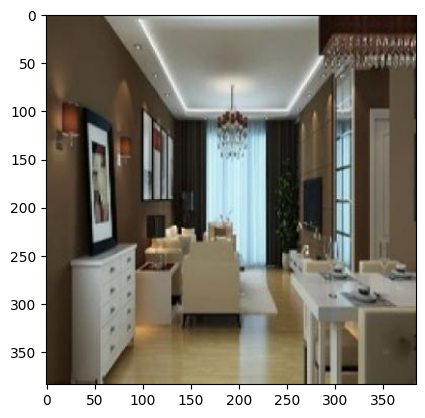

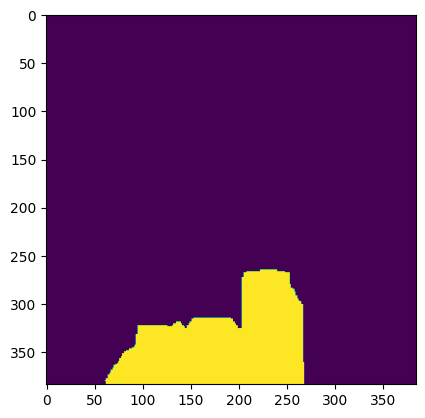

In [16]:
# Show a random training image and mask
import random
image_number = random.randint(0, len(X_train))
print(image_number)
print(X_train[image_number].shape)
print(Y_train[image_number].shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[image_number])
plt.show()
plt.imshow(np.squeeze(Y_train[image_number]))
plt.show()


In [17]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________


2023-10-30 11:35:29.249319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 11:35:29.249428: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 11:35:29.249482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 384, 384, 3)]        0         []                            
                                                                                                  
 lambda (Lambda)             (None, 384, 384, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 384, 384, 16)         448       ['lambda[0][0]']              
                                                                                                  
 dropout (Dropout)           (None, 384, 384, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 384, 384, 16)         2320      ['dropout[0][0]']             
          

In [18]:
# Model checkpoint
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
              tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
              tf.keras.callbacks.TensorBoard(log_dir='logs')]


results = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=16, epochs=100, callbacks=callbacks,)


Epoch 1/100


2023-10-30 11:35:34.029123: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-10-30 11:35:34.029145: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-10-30 11:35:34.029162: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2023-10-30 11:35:34.029181: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas be

 1/43 [..............................] - ETA: 10:07 - loss: 0.7211 - accuracy: 0.5426

2023-10-30 11:35:48.587849: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.



43/43 [==============================] - 25s 251ms/step - loss: 0.4891 - accuracy: 0.8440 - val_loss: 0.3309 - val_accuracy: 0.8664
Epoch 2/100
43/43 [==============================] - 7s 172ms/step - loss: 0.2503 - accuracy: 0.8599 - val_loss: 0.2395 - val_accuracy: 0.8872
Epoch 3/100
43/43 [==============================] - 7s 172ms/step - loss: 0.1670 - accuracy: 0.9338 - val_loss: 0.1704 - val_accuracy: 0.9265
Epoch 4/100
43/43 [==============================] - 7s 172ms/step - loss: 0.1281 - accuracy: 0.9464 - val_loss: 0.1261 - val_accuracy: 0.9462
Epoch 5/100
43/43 [==============================] - 7s 172ms/step - loss: 0.1139 - accuracy: 0.9508 - val_loss: 0.1129 - val_accuracy: 0.9497
Epoch 6/100
43/43 [==============================] - 7s 174ms/step - loss: 0.1140 - accuracy: 0.9514 - val_loss: 0.1341 - val_accuracy: 0.9446
Epoch 7/100
43/43 [==============================] - 7s 174ms/step - loss: 0.1064 - accuracy: 0.9548 - val_loss: 0.1131 - val_accuracy: 0.9507
Epoch 8/10

In [31]:
%pwd

'/home/luishuingo/semantics_segmentation'

In [25]:
# borramos la memoria de la GPU
from numba import cuda
cuda.select_device(0)
cuda.close()

In [11]:
# We are going to save the model
# model.save('unet_custome.h5')

In [20]:
# #############################################
idx = random.randint(0, len(X_train))

preds_train = model.predict(X_train, verbose=1)
preds_val = model.predict(X_valid, verbose=1)
preds_test = model.predict(X_test, verbose=1)


# Threshold predictions
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


2/2 [==============================] - 0s 67ms/step


In [21]:
type(X_train)

numpy.ndarray

287
(384, 384, 3)
(384, 384, 1)


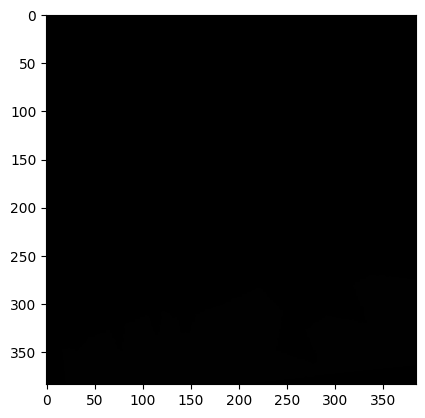

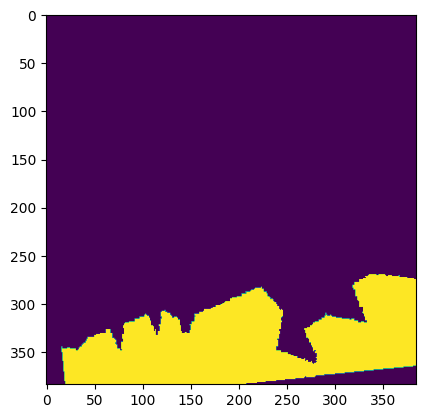

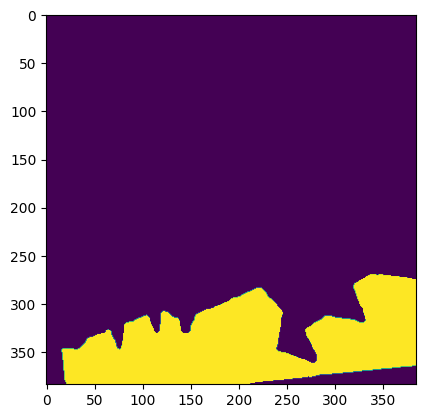

In [23]:
# Show a random prediction using OpenCV
image_number = random.randint(0, len(X_train))
print(image_number)
print(X_train[image_number].shape)
print(Y_train[image_number].shape)
import matplotlib.pyplot as plt
plt.imshow(X_train[image_number])
plt.show()
plt.imshow(np.squeeze(Y_train[image_number]))
plt.show()
plt.imshow(np.squeeze(preds_train_t[image_number]))
plt.show()


In [24]:
config_dict = model.get_config()
config_dict

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 384, 384, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Lambda',
   'config': {'name': 'lambda',
    'trainable': True,
    'dtype': 'float32',
    'function': ('4wEAAAAAAAAAAAAAAAEAAAACAAAAQwAAAHMIAAAAfABkARsAUwApAk7p/wAAAKkAKQHaAXhyAgAA\nAHICAAAA+iMvdG1wL2lweWtlcm5lbF82NzQ1NTAvNDE4NDgyNjgwMC5wedoIPGxhbWJkYT4DAAAA\ncwIAAAAIAA==\n',
     None,
     None),
    'function_type': 'lambda',
    'module': '__main__',
    'output_shape': None,
    'output_shape_type': 'raw',
    'output_shape_module': None,
    'arguments': {}},
   'registered_name': None,
   'build_config': {'input_shape': (None, 384, 384, 3)},
   'name': 'lambda',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]}